In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('house_data.csv')
print(df)

               id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  vi

    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3       1.00         1180      5650     1.0           0   
1  538000         3       2.25         2570      7242     2.0           0   
2  180000         2       1.00          770     10000     1.0           0   
3  604000         4       3.00         1960      5000     1.0           0   
4  510000         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15 

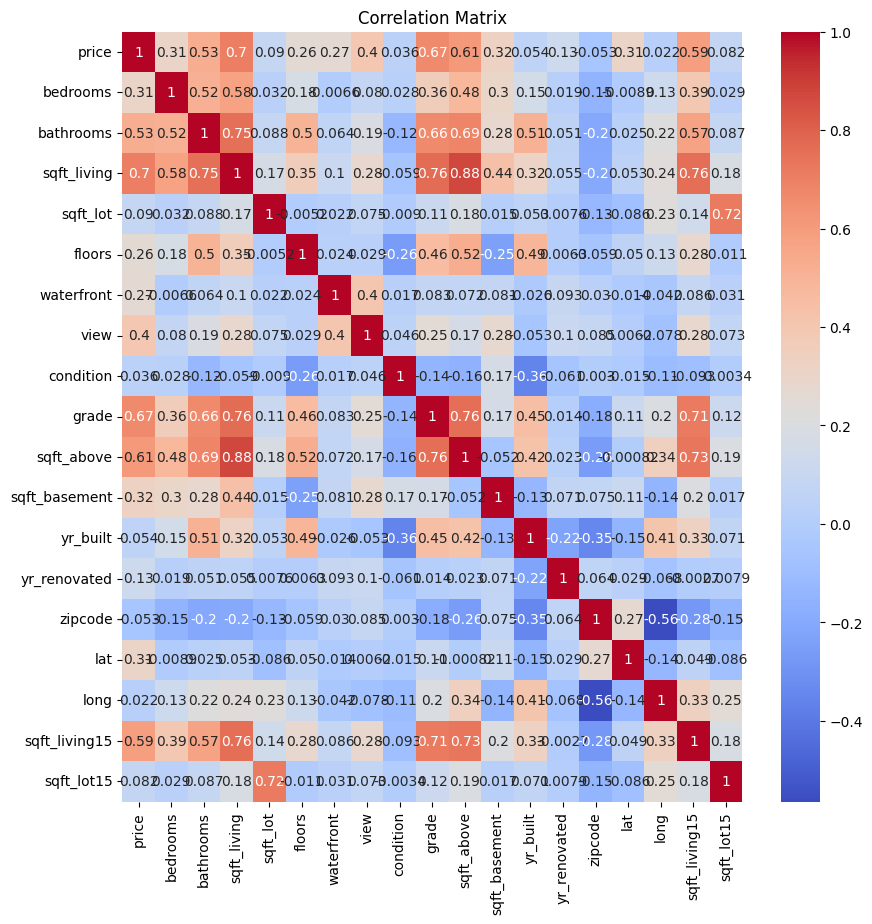

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from CSV

df = df.drop('date',axis=1)
df = df.drop('id',axis=1)

# Exploratory Data Analysis (EDA)
# Let's take a quick look at the first few rows of the dataset
print(df.head())

# Summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Calculate correlation matrix
correlation_matrix = df.corr()
# Correlation matrix to understand feature relationships


plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Preprocessing: Selecting features and target variable
#X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','grade','sqft_living15', 'sqft_above','floors', 'waterfront', 'view', 'condition']]
X = df.copy().drop('price',axis=1)
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# Coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients of the model:")
print(coefficients)

Mean Squared Error: 45173046132.79291
R-squared: 0.701190444887823

Coefficients of the model:
          Feature    Coefficient
0        bedrooms  -34335.418739
1       bathrooms   44564.528881
2     sqft_living     109.015817
3        sqft_lot       0.088847
4          floors    7003.129520
5      waterfront  562413.070005
6            view   53641.107022
7       condition   24526.710105
8           grade   94567.891697
9      sqft_above      70.022741
10  sqft_basement      38.993076
11       yr_built   -2680.768897
12   yr_renovated      20.415633
13        zipcode    -552.253038
14            lat  595968.122144
15           long -194585.724048
16  sqft_living15      21.214331
17     sqft_lot15      -0.325832


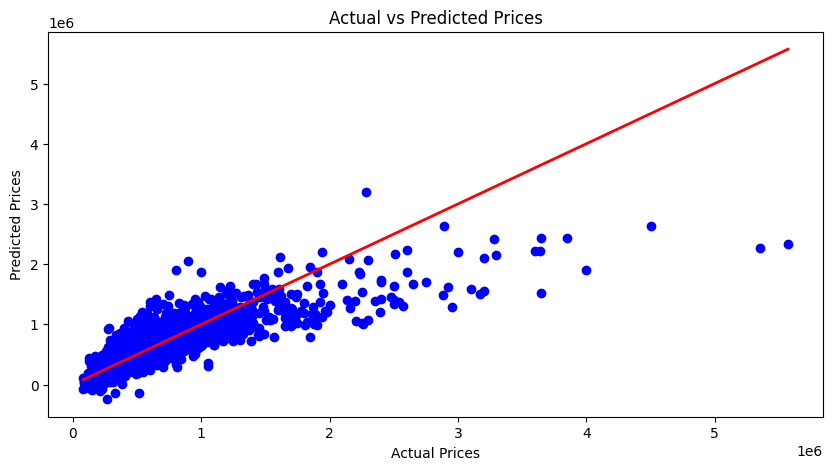

In [15]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()